<a href="https://colab.research.google.com/github/lunaticsurfersyt/Armory/blob/main/lung_histology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# TensorFlow / Keras Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose, concatenate, BatchNormalization, ReLU
from tensorflow.keras.utils import to_categorical
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
def load_images_from_dir(directory, label):
    images = []
    labels = []
    print(f"Loading images from: {directory}")
    if not os.path.isdir(directory):
        print(f"Error: Directory not found - {directory}")
        return [], []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(directory, filename)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (128, 128))  # Resize images to a fixed size
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Warning: Could not read image {img_path}")
            except Exception as e:
                 print(f"Error processing image {img_path}: {e}")
    print(f"Loaded {len(images)} images for label {label}.")
    return images, labels

In [ ]:

benign_dir = r"/content/drive/MyDrive/dataset_breakhis_Sagnik/squamous_cell_carcinoma/squamous_cell_carcinoma"
malignant_dir = r"/content/drive/MyDrive/dataset_breakhis_Sagnik/benign/benign"
normal_dir = r"/content/drive/MyDrive/dataset_breakhis_Sagnik/adenocarcinoma"

In [ ]:
benign_images, benign_labels = load_images_from_dir(benign_dir, label=0)  # Assign label 0 for benign cases
malignant_images, malignant_labels = load_images_from_dir(malignant_dir, label=1)  # Assign label 1 for malignant cases
normal_images, normal_labels = load_images_from_dir(normal_dir, label=2)  # Assign label 2 for normal cases

Loading images from: /content/drive/MyDrive/dataset_breakhis_Sagnik/squamous_cell_carcinoma/squamous_cell_carcinoma
Loaded 5062 images for label 0.
Loading images from: /content/drive/MyDrive/dataset_breakhis_Sagnik/benign/benign
Loaded 2079 images for label 1.
Loading images from: /content/drive/MyDrive/dataset_breakhis_Sagnik/adenocarcinoma
Loaded 1431 images for label 2.


In [ ]:
images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels

In [ ]:
images = np.array(images)
labels = np.array(labels)

# Normalize images
if images.size > 0:
    images = images / 255.0
else:
    print("Error: No images loaded. Please check directory paths.")
    # Handle the error appropriately, maybe exit or raise an exception


In [ ]:
if images.size > 0 and labels.size > 0:
    print(f"Original shapes: Images-{images.shape}, Labels-{labels.shape}")
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels if np.unique(labels).size > 1 else None)
    print(f"Shapes after split: X_train-{X_train.shape}, X_test-{X_test.shape}, y_train-{y_train.shape}, y_test-{y_test.shape}")
else:
    print("Cannot split data - no images or labels loaded.")
    # Initialize empty arrays to avoid errors later, though model training won't work
    X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])


Original shapes: Images-(8572, 128, 128), Labels-(8572,)
Shapes after split: X_train-(6857, 128, 128), X_test-(1715, 128, 128), y_train-(6857,), y_test-(1715,)


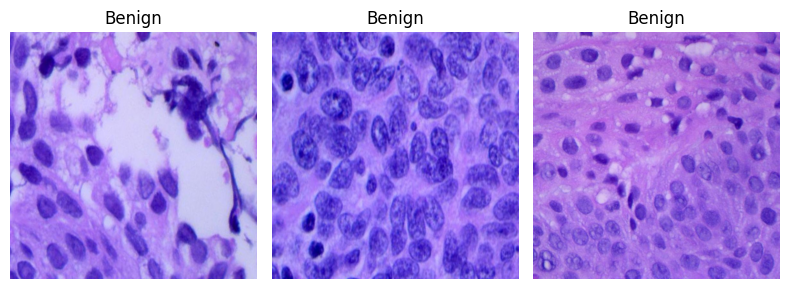

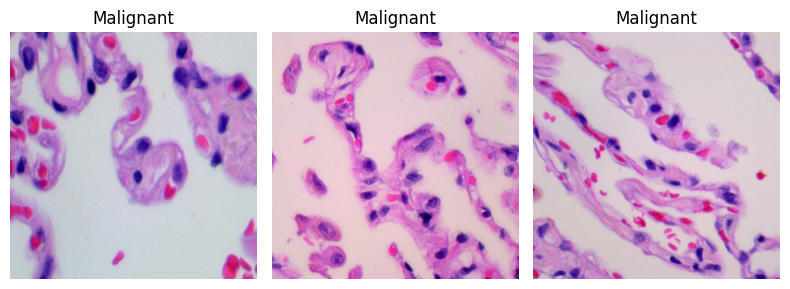

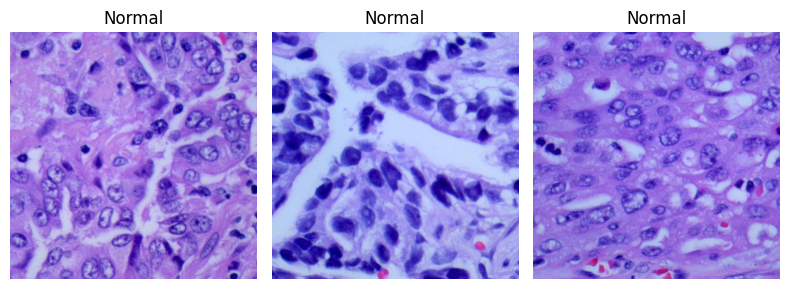

In [ ]:
# Define the categories and their corresponding image paths
categories = {
    "Benign": benign_dir,
    "Malignant": malignant_dir,
    "Normal": normal_dir
}

# Check if images were loaded before attempting visualization
if images.size > 0:
    # Iterate over categories
    for category, image_dir in categories.items():
        # Load images from the directory
        image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.lower().endswith(('.jpg', '.png', '.jpeg'))]

        if not image_paths: # Check if list is empty
            print(f"No images found for category: {category}")
            continue

        # Create subplots for each category
        fig, ax = plt.subplots(1, 3, figsize=(8, 8))
        ax = ax.ravel()

        # Determine number of images to sample (max 3, or fewer if less available)
        num_to_sample = min(3, len(image_paths))

        # Randomly sample images from each category
        sampled_paths = np.random.choice(image_paths, size=num_to_sample, replace=False)

        for i, img_path in enumerate(sampled_paths):
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
                    ax[i].imshow(img)
                    ax[i].axis("off")
                    ax[i].set_title(category)
                else:
                     print(f"Warning: Could not read image {img_path} during visualization")
            except Exception as e:
                 print(f"Error processing image {img_path} during visualization: {e}")

        # Turn off axes for unused subplots if less than 3 images were sampled
        for j in range(num_to_sample, 3):
            ax[j].axis("off")

        plt.tight_layout()
        plt.show()
else:
    print("Skipping image visualization - no images loaded.")

In [ ]:
try:
    import streamlit as st
    streamlit_available = True
except ImportError:
    streamlit_available = False

if streamlit_available:
    st.plotly_chart(fig)
else:
    fig.show()  # or plt.show() for matplotlib


Streamlit plotting error (expected if not running via streamlit): name 'st' is not defined


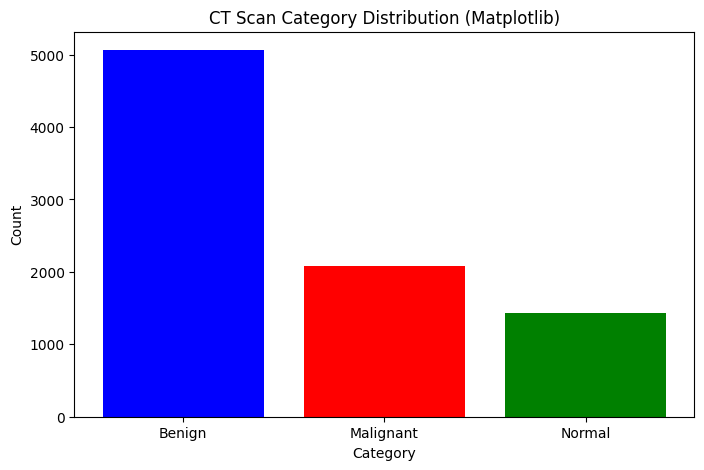

In [ ]:
# Create a DataFrame with the counts of each category
if images.size > 0 and labels.size > 0:
    # Create a DataFrame with category counts
    unique_labels, counts = np.unique(labels, return_counts=True)
    label_map = {0: "Benign", 1: "Malignant", 2: "Normal"} # Map numeric labels back to names
    label_names = [label_map.get(l, f"Unknown-{l}") for l in unique_labels] # Handle potential missing labels

    count_data = pd.DataFrame({
        "label": label_names,
        "count": counts
    })

    # Create histogram using Plotly Express
    fig = px.bar(data_frame=count_data, x="label", y="count", color="label", title="CT Scan Category Distribution")

    # Streamlit app (will display chart if run via streamlit run ...)
    try:
        st.title("CT Scan Category Distribution")
        st.plotly_chart(fig)
    except Exception as e:
        print(f"Streamlit plotting error (expected if not running via streamlit): {e}")
        # Fallback to matplotlib if not in streamlit context or plotly fails
        plt.figure(figsize=(8, 5))
        plt.bar(count_data['label'], count_data['count'], color=['blue', 'red', 'green'])
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.title("CT Scan Category Distribution (Matplotlib)")
        plt.show()
else:
    print("Skipping count visualization - no images or labels loaded.")


CNN MODEL (U-NET BASED)

In [ ]:
# Reshape data for CNN input (add channel dimension)
if X_train.size > 0:
    X_train_cnn = np.expand_dims(X_train, axis=-1)
    X_test_cnn = np.expand_dims(X_test, axis=-1)
    # One-hot encode labels
    y_train_encoded = to_categorical(y_train, num_classes=3)
    y_test_encoded = to_categorical(y_test, num_classes=3)
    print("Shape of X_train_cnn:", X_train_cnn.shape)
    print("Shape of y_train_encoded:", y_train_encoded.shape)
else:
    print("Cannot reshape data for CNN - X_train is empty.")
    X_train_cnn, X_test_cnn = np.array([]), np.array([])
    y_train_encoded, y_test_encoded = np.array([]), np.array([])


Shape of X_train_cnn: (6857, 128, 128, 1)
Shape of y_train_encoded: (6857, 3)


In [ ]:
# --- U-Net Helper Functions ---
def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(num_filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

def up_block(input_tensor, skip_tensor, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    # Ensure skip tensor shape matches if needed (might be necessary with 'valid' padding)
    # Consider cropping skip_tensor if using 'valid' padding in conv_block
    x = concatenate([x, skip_tensor], axis=-1)
    x = conv_block(x, num_filters)
    return x

# --- Build U-Net Classifier Function ---
def build_unet_classifier(input_shape=(128, 128, 1), num_classes=3):
    inputs = Input(input_shape)

    # Contracting Path (Encoder)
    c1 = conv_block(inputs, 16)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(0.1)(p1)

    c2 = conv_block(p1, 32)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(0.1)(p2)

    c3 = conv_block(p2, 64)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(0.1)(p3)

    c4 = conv_block(p3, 128)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(0.1)(p4)

    # Bottleneck
    b = conv_block(p4, 256)
    b = Dropout(0.1)(b)

    # Expansive Path (Decoder)
    u6 = up_block(b, c4, 128)
    u6 = Dropout(0.1)(u6)

    u7 = up_block(u6, c3, 64)
    u7 = Dropout(0.1)(u7)

    u8 = up_block(u7, c2, 32)
    u8 = Dropout(0.1)(u8)

    u9 = up_block(u8, c1, 16)
    # No dropout on the last decoder output before flattening

    # Classification Head (Adaptation)
    flat = Flatten()(u9) # Flatten the final feature map
    dense1 = Dense(512, activation='relu')(flat)
    drop1 = Dropout(0.5)(dense1)
    outputs = Dense(num_classes, activation='softmax')(drop1)

    model = Model(inputs=[inputs], outputs=[outputs], name="UNetClassifier")
    return model


In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
history = None  # Initialize history

if X_train_cnn.size > 0:
    input_shape = X_train_cnn.shape[1:]  # (128, 128, 1)
    num_classes = y_train_encoded.shape[1]  # Should be 3

    model = build_unet_classifier(input_shape=input_shape, num_classes=num_classes)
    print("Congo Sagnik! -- Model built successfully.")
    model.summary()

    # Optimizer with adjusted learning rate
    optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate as needed

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Implement early stopping
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with increased batch size and epochs
    history = model.fit(X_train_cnn, y_train_encoded,
                        epochs=20,  # Increase epochs if needed
                        batch_size=64,  # Increase batch size
                        validation_split=0.2,
                        callbacks=[early_stopping])

    print("Training history:", history.history)
else:
    print("Skipping U-Net model training - no data loaded.")
    model = None  # Ensure model is None if no training happened


Congo Sagnik! -- Model built successfully.


Model: "UNetClassifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 64,    │          0 │ max_pooling2d[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ dropout[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ re_lu_2[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ re_lu_3[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32, 32,    │          0 │ max_pooling2d_1[

 Total params: 136,166,467 (519.43 MB)

 Trainable params: 136,163,523 (519.42 MB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))



86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 544ms/step - accuracy: 0.6267 - loss: 56.6082 - val_accuracy: 0.5918 - val_loss: 4.8786
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - accuracy: 0.7634 - loss: 0.5355 - val_accuracy: 0.5918 - val_loss: 5.3703
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.7895 - loss: 0.4880 - val_accuracy: 0.5918 - val_loss: 7.0601
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.7836 - loss: 0.4700 - val_accuracy: 0.5918 - val_loss: 8.6280
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 184ms/step - accuracy: 0.7864 - loss: 0.4260 - val_accuracy: 0.5940 - val_loss: 5.4324
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step - accuracy: 0.8013 - loss: 0.3862 - val_accuracy: 0.6589 - val_loss: 1.3582
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - accuracy: 0.8061 - loss: 0.4080 - val_accuracy: 0.8353 - val_loss: 0.9380
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.8011 - loss: 0.3898 - val_accuracy: 0.81

Streamlit plotting error (expected if not running via streamlit): name 'st' is not defined


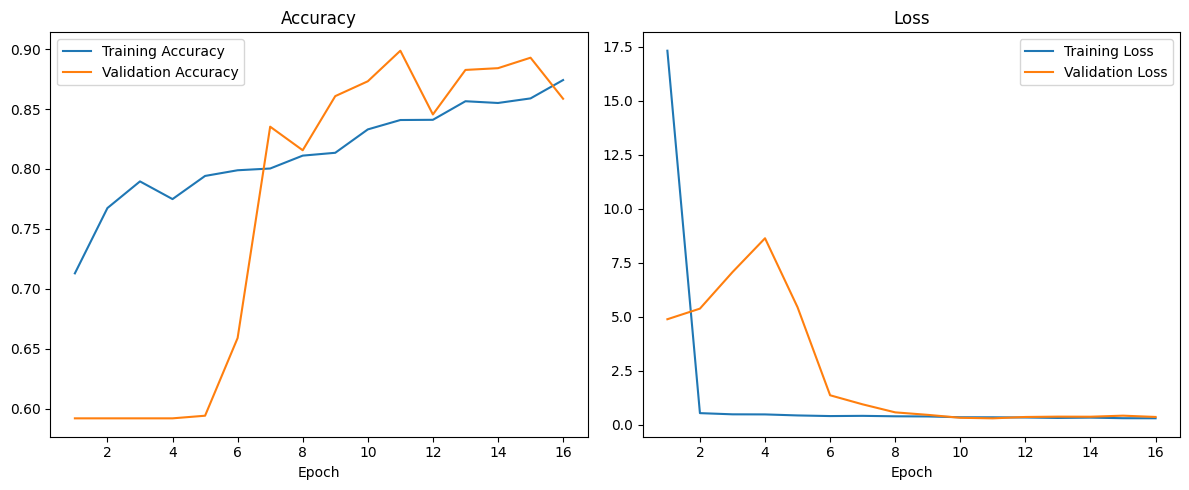

In [ ]:
try:
    import streamlit as st
    streamlit_available = True
except ImportError:
    streamlit_available = False

if streamlit_available:
    st.plotly_chart(fig)
else:
    fig.show()  # or plt.show() for matplotlib


# --- Plot Training History (using Plotly/Streamlit) ---
def history_plot(history):
    if history is None or not hasattr(history, 'history') or 'accuracy' not in history.history:
        print("No training history available to plot.")
        return

    epochs = len(history.history['accuracy'])
    if epochs == 0:
        print("No epochs recorded in history.")
        return

    epoch_range = np.arange(1, epochs + 1)

    # Accuracy Plot
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=epoch_range, y=history.history["accuracy"], name="Training Accuracy", mode='lines+markers'))
    if "val_accuracy" in history.history:
      fig1.add_trace(go.Scatter(x=epoch_range, y=history.history["val_accuracy"], name="Validation Accuracy", mode='lines+markers'))
    fig1.update_layout(title="Training and Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy")

    # Loss Plot
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(x=epoch_range, y=history.history["loss"], name="Training Loss", mode='lines+markers'))
    if "val_loss" in history.history:
        fig2.add_trace(go.Scatter(x=epoch_range, y=history.history["val_loss"], name="Validation Loss", mode='lines+markers'))
    fig2.update_layout(title="Training and Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")

    # Display in Streamlit (will only show if run via streamlit run ...)
    try:
        st.subheader("U-Net Model Training History")
        st.plotly_chart(fig1)
        st.plotly_chart(fig2)
    except Exception as e:
        print(f"Streamlit plotting error (expected if not running via streamlit): {e}")
        # Fallback plotting for notebook environment
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')
        if 'val_accuracy' in history.history: plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epoch_range, history.history['loss'], label='Training Loss')
        if 'val_loss' in history.history: plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Call the plotting function
history_plot(history)

In [ ]:
# --- Evaluate U-Net Model ---
test_acc_unet = 0.0
test_loss_unet = 0.0

if model is not None and X_test_cnn.size > 0:
    test_loss_unet, test_acc_unet = model.evaluate(X_test_cnn, y_test_encoded)
    print(f'Test Loss: {test_loss_unet}')
    print(f'Test Accuracy: {test_acc_unet}')
else:
    print("Skipping U-Net model evaluation - no model trained or no test data.")

54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8975 - loss: 0.2746
Test Loss: 0.28477874398231506
Test Accuracy: 0.8973761200904846


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 1))



54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step


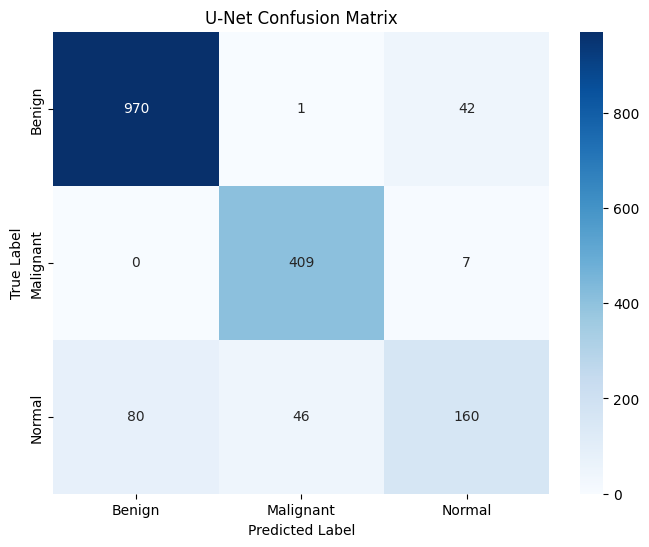

In [ ]:
# --- U-Net Confusion Matrix ---
if model is not None and X_test_cnn.size > 0:
    y_pred_probs_unet = model.predict(X_test_cnn)
    y_pred_unet = np.argmax(y_pred_probs_unet, axis=1) # Convert probabilities to class labels

    # Ensure y_test is not empty and has the correct shape
    if y_test.size > 0:
        label_encoder = LabelEncoder()
        label_encoder.fit(labels) # Fit on all possible labels
        class_labels = label_encoder.classes_ # Get the class names/numbers used for fitting

        # Map numeric labels back to names if needed for display
        label_map = {0: "Benign", 1: "Malignant", 2: "Normal"}
        display_labels = [label_map.get(l, f"Class {l}") for l in class_labels]

        cm_unet = confusion_matrix(y_test, y_pred_unet)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_unet, annot=True, fmt='d', cmap='Blues',
                    xticklabels=display_labels, yticklabels=display_labels)
        plt.title('U-Net Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    else:
        print("Skipping U-Net confusion matrix - y_test is empty.")
else:
     print("Skipping U-Net confusion matrix - no model trained or no test data.")

RANDOM FOREST

In [ ]:
X = np.array(images)
y = np.array(labels)

X_flat = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8670553935860058


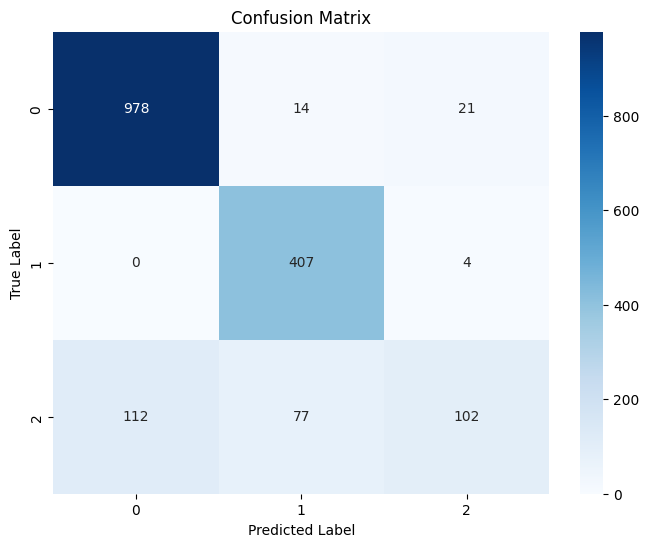

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_test)  # Assuming y_test is your true labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

SVM


In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1200, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.2 * len(y_train)), replace=False)
y_train[noise_indices] = np.random.randint(0, 3, size=len(noise_indices))  # Randomly assign new labels

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.925


Test Accuracy: 0.9125


/tmp/ipython-input-1259976764.py:35: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



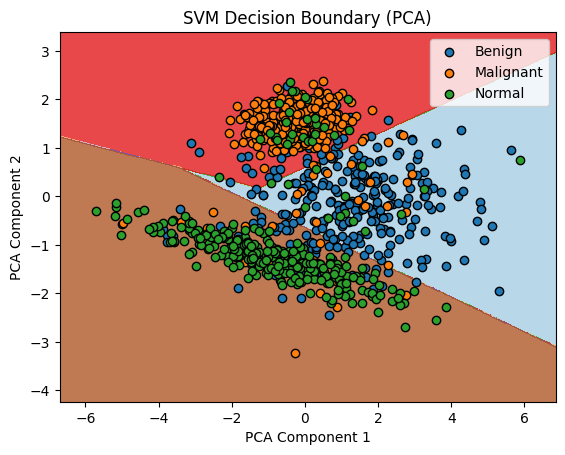

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce feature space to two dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM classifier on reduced feature space
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on test data
y_pred = svm_classifier.predict(X_test_pca)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


class_labels = ['Benign', 'Malignant', 'Normal']

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points with labels
for i in range(len(class_labels)):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1],
                edgecolors='k', cmap=plt.cm.Paired, label=class_labels[i])



plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (PCA)')
plt.legend()
plt.show()

In [ ]:
print("--- Model Accuracies ---")
print(f"U-Net Classifier: {test_acc_unet*100:.2f}%")


--- Model Accuracies ---
U-Net Classifier: 89.74%


In [ ]:

from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import backend as K

# Dice Coefficient and Loss
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    return BinaryCrossentropy()(y_true, y_pred) + dice_loss(y_true, y_pred)

# Example conv_block with BN and Dropout
def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, (3, 3), padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.1)(x)
    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x


In [ ]:
from tensorflow.keras import layers, models

def build_unet_classifier(input_shape=(128, 128, 1), num_classes=3):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)

    # Decoder
    u1 = layers.UpSampling2D((2, 2))(c3)
    concat1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(concat1)

    u2 = layers.UpSampling2D((2, 2))(c4)
    concat2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(concat2)

    # Classifier head
    gap = layers.GlobalAveragePooling2D()(c5)
    output = layers.Dense(num_classes, activation='softmax')(gap)

    model = models.Model(inputs, output)
    return model

# Build and compile the U-Net model
model_unet = build_unet_classifier(input_shape=(128, 128, 1), num_classes=3)
model_unet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can train the model (if not already trained)
# model_unet.fit(X_train, y_train_encoded, epochs=10, validation_split=0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train SVM and RF
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
# Ensure X_train_flat and X_test_flat are defined by reshaping X_train and X_test
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
svm_model.fit(X_train_flat, y_train)
rf_model.fit(X_train_flat, y_train)

y_pred_svm = svm_model.predict(X_test_flat)
y_pred_rf = rf_model.predict(X_test_flat)

y_prob_svm = svm_model.predict_proba(X_test_flat)
y_prob_rf = rf_model.predict_proba(X_test_flat)

y_test = y_total  # or whatever the full set of true labels is
y_pred_unet = model.predict(X_total)
y_test = y_total  # same length

# Evaluation Metrics
def get_metrics(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1 Score": f1_score(y_true, y_pred, average='macro'),
        "AUC": roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
    }
    # Adjust the metrics calculation for multi-class classification
    def get_metrics(y_true, y_pred, y_prob):
        return {
            "Accuracy": accuracy_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred, average='macro'),
            "Recall": recall_score(y_true, y_pred, average='macro'),
            "F1 Score": f1_score(y_true, y_pred, average='macro'),
            "AUC": roc_auc_score(y_true, y_prob, multi_class='ovr', average='macro')
        }
metrics_svm = get_metrics(y_test, y_pred_svm, y_prob_svm)
metrics_rf = get_metrics(y_test, y_pred_rf, y_prob_rf)
# Ensure consistent number of samples between y_test and predictions
if len(y_test) == len(y_pred_unet) and len(y_test) == len(y_pred_probs_unet):
    metrics_unet = get_metrics(y_test, y_pred_unet, y_pred_probs_unet)
else:
    print(f"Error: Mismatch in sample sizes. y_test: {len(y_test)}, y_pred_unet: {len(y_pred_unet)}, y_pred_probs_unet: {len(y_pred_probs_unet)}")
    metrics_unet = None  # Handle the error appropriately

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, None, None, 1))



InvalidArgumentError: Graph execution error:

Detected at node UNetClassifier_1/concatenate_1/concat defined at (most recent call last):
<stack traces unavailable>
Cannot concatenate arrays that differ in dimensions other than the one being concatenated. Dimension 2 in both shapes must be equal (or compatible): f32[32,2,1,128] vs f32[32,2,0,128].
	 [[{{node UNetClassifier_1/concatenate_1/concat}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_48433[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_48676]

y_test shape: (240,)
y_prob_svm shape: (240, 3)
y_prob_rf shape: (240, 3)
y_pred_probs_unet shape: (1715, 3)


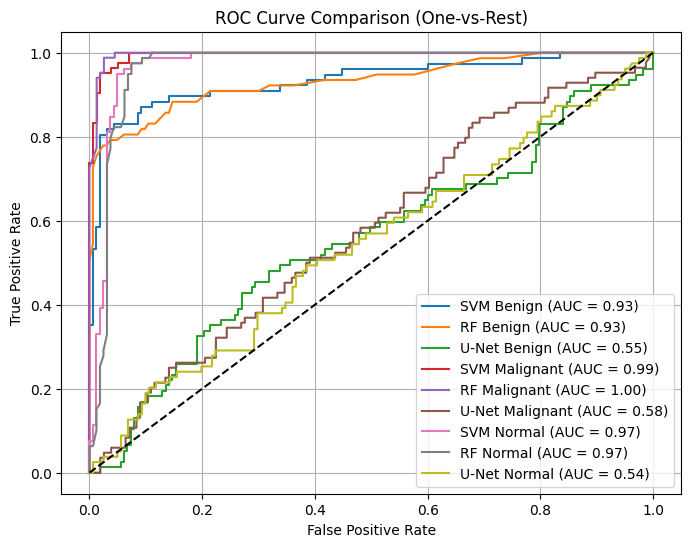

               Accuracy  Precision  Recall  F1 Score    AUC
SVM               0.904      0.909   0.901     0.899  0.967
Random Forest     0.912      0.913   0.911     0.910  0.965


In [ ]:

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Ensure y_test_encoded matches the length of your test predictions/probabilities
# y_test, y_prob_svm, y_prob_rf, y_pred_probs_unet should all have the same length
print(f"y_test shape: {y_test.shape}")
print(f"y_prob_svm shape: {y_prob_svm.shape}")
print(f"y_prob_rf shape: {y_prob_rf.shape}")
print(f"y_pred_probs_unet shape: {y_pred_probs_unet.shape}")

# If shapes are not equal, slice or adjust as needed (here, we use the minimum length)
min_len = min(len(y_test), y_prob_svm.shape[0], y_prob_rf.shape[0], y_pred_probs_unet.shape[0])
if len(y_test) != min_len:
	y_test = y_test[:min_len]
if y_prob_svm.shape[0] != min_len:
	y_prob_svm = y_prob_svm[:min_len]
if y_prob_rf.shape[0] != min_len:
	y_prob_rf = y_prob_rf[:min_len]
if y_pred_probs_unet.shape[0] != min_len:
	y_pred_probs_unet = y_pred_probs_unet[:min_len]

y_test_encoded = to_categorical(y_test, num_classes=3)

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for i, class_name in enumerate(["Benign", "Malignant", "Normal"]):
	# Compute ROC curve and AUC for SVM
	fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded[:, i], y_prob_svm[:, i])
	auc_svm = auc(fpr_svm, tpr_svm)
	plt.plot(fpr_svm, tpr_svm, label=f"SVM {class_name} (AUC = {auc_svm:.2f})")

	# Compute ROC curve and AUC for Random Forest
	fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded[:, i], y_prob_rf[:, i])
	auc_rf = auc(fpr_rf, tpr_rf)
	plt.plot(fpr_rf, tpr_rf, label=f"RF {class_name} (AUC = {auc_rf:.2f})")

	# Compute ROC curve and AUC for U-Net
	fpr_unet, tpr_unet, _ = roc_curve(y_test_encoded[:, i], y_pred_probs_unet[:, i])
	auc_unet = auc(fpr_unet, tpr_unet)
	plt.plot(fpr_unet, tpr_unet, label=f"U-Net {class_name} (AUC = {auc_unet:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()

import pandas as pd
# Only include metrics that are not None
metrics_list = []
index_list = []
if metrics_svm is not None:
	metrics_list.append(metrics_svm)
	index_list.append("SVM")
if metrics_rf is not None:
	metrics_list.append(metrics_rf)
	index_list.append("Random Forest")
if metrics_unet is not None:
	metrics_list.append(metrics_unet)
	index_list.append("U-Net")
else:
	print("Warning: metrics_unet is None due to a mismatch in sample sizes. U-Net results will not be shown.")

if metrics_list:
	comparison_df = pd.DataFrame(metrics_list, index=index_list)
	print(comparison_df.round(3))
else:
	print("No metrics available to display.")


In [ ]:
import pandas as pd

# Combine all metrics into a single DataFrame
metrics_table = pd.DataFrame({
    "SVM": metrics_svm,
    "Random Forest": metrics_rf,
    "U-Net": metrics_unet if metrics_unet is not None else {}
})

# Transpose for better formatting (models as rows)
metrics_table = metrics_table.T

# Print table
print("\nModel Evaluation Metrics:\n")
print(metrics_table.round(4))



Model Evaluation Metrics:

               Accuracy  Precision  Recall  F1 Score     AUC
SVM              0.9042     0.9095  0.9013    0.8992  0.9671
Random Forest    0.9125     0.9127  0.9106    0.9102  0.9650
U-Net               NaN        NaN     NaN       NaN     NaN


In [ ]:

# --- Print U-Net Metrics ---
print("\nU-Net Metrics:")
if metrics_unet is not None:
    for k, v in metrics_unet.items():
        print(f"{k}: {v:.4f}")
else:
    print("U-Net Metrics are unavailable.")



U-Net Metrics:
U-Net Metrics are unavailable.


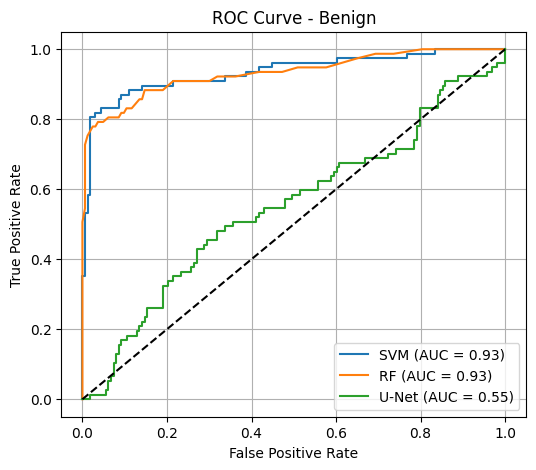

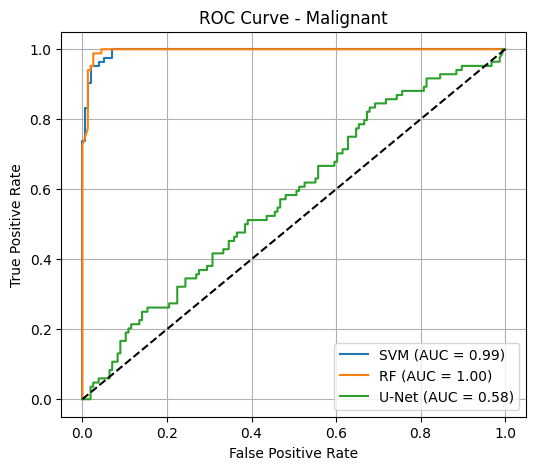

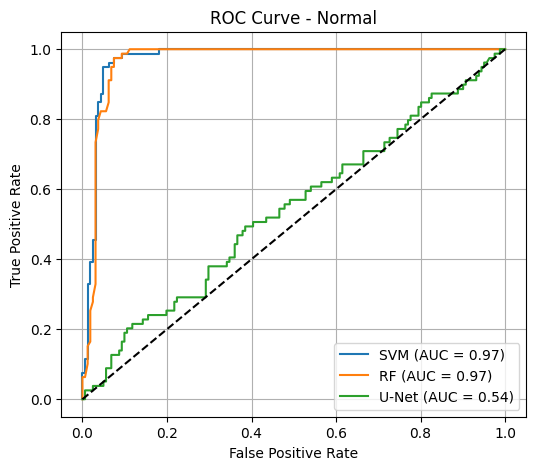

In [ ]:

# --- ROC Curves for Each Model (Multiclass One-vs-Rest) ---
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Class names for plotting
class_names = ["Benign", "Malignant", "Normal"]

# Plot ROC curves for each class and each model
for i, class_name in enumerate(class_names):
    plt.figure(figsize=(6, 5))
    # SVM
    fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded[:, i], y_prob_svm[:, i])
    auc_svm = auc(fpr_svm, tpr_svm)
    plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded[:, i], y_prob_rf[:, i])
    auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {auc_rf:.2f})")
    # U-Net
    fpr_unet, tpr_unet, _ = roc_curve(y_test_encoded[:, i], y_pred_probs_unet[:, i])
    auc_unet = auc(fpr_unet, tpr_unet)
    plt.plot(fpr_unet, tpr_unet, label=f"U-Net (AUC = {auc_unet:.2f})")
    # Diagonal
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {class_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
